The algorithm used for recommendations aims to convert the number of interactions with the product into as many purchases as possible, so decisions will be made in pursuit of this, for example we will not recommend products that are not the customer's measurements.

In [183]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 
import warnings

In [184]:
data = pd.read_csv('../input/ecommerce-fashion-dataset/FashionDataset.csv',encoding='latin')
data

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and gold pearl necklace,Nan,Nan,2799,Nan,Jewellery-Women


In [185]:
data = data[data.columns[1:]]

In [186]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [187]:
for column in data:
    print(column, (data[column] == "Nan").sum() / len(data) * 100)

BrandName 3.8461538461538463
Deatils 3.8461538461538463
Sizes 24.387151310228234
MRP 26.68574029520775
SellPrice 3.8461538461538463
Discount 26.68574029520775
Category 0.0


In [188]:
for column in data:
    print(column, data[column].dtypes)

BrandName object
Deatils object
Sizes object
MRP object
SellPrice object
Discount object
Category object


In [189]:
import numpy as np

In [190]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [191]:
data["BrandName"] = data["BrandName"].replace(['Nan'], data["BrandName"].value_counts().index[0])

In [192]:
for column in data:
    data[column] = data[column].replace(['Nan'], data[column].value_counts().index[1])
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [193]:
for column in data:
    print(column, (data[column] == "Nan").sum() / len(data) * 100)

BrandName 0.0
Deatils 0.0
Sizes 0.0
MRP 0.0
SellPrice 0.0
Discount 0.0
Category 0.0


In [194]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df = data
df["SellPrice"] = pd.to_numeric(df["SellPrice"])
df["SellPrice"]

0         849
1        2449
2         599
3        1379
4         849
         ... 
30753    8950
30754     499
30755     643
30756    2799
30757    1899
Name: SellPrice, Length: 30758, dtype: int64

In [196]:
data = df
for column in data:
    print(column, data[column].dtypes)

BrandName object
Deatils object
Sizes object
MRP object
SellPrice int64
Discount object
Category object


In [197]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [198]:
#change the text data into numerical by encoding it with the label encoder library in sklearn
#since the SellPrice column in already numerical, then no need of encoding it
for column in data:
    if (column != "SellPrice"):
        encoded = encoder.fit_transform(data[column])
        data[column] = encoded
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,154,12168,960,223,849,34,6
1,186,6464,460,659,2449,14,6
2,95,13668,1007,64,599,34,6
3,270,16644,959,412,1379,25,6
4,154,10999,83,223,849,34,6


**The heatmap**

<AxesSubplot:>

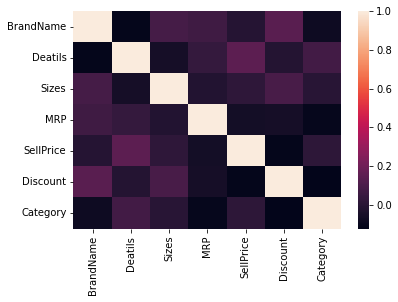

In [199]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

**Correlation Matrix**

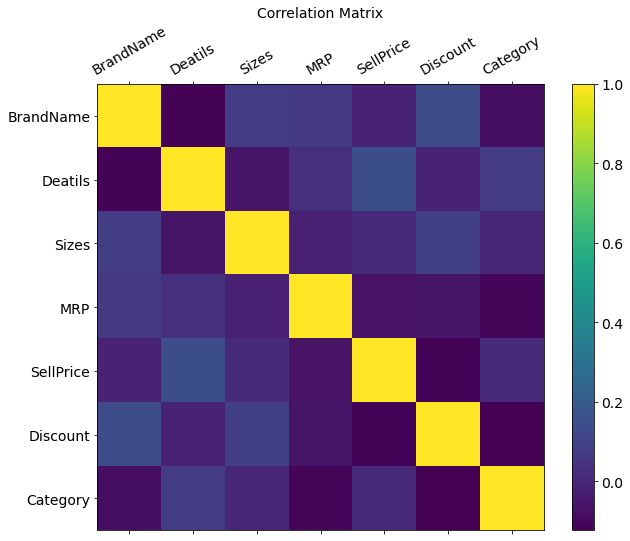

In [200]:
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=30)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14);

**Boxplot**

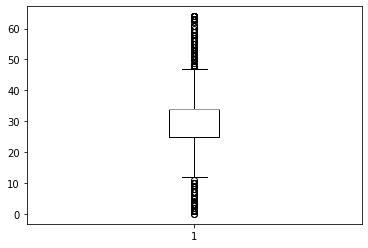

In [201]:
plt.boxplot(df["Discount"])
plt.show()

**Feature Independence Plots/Scatter plot.**

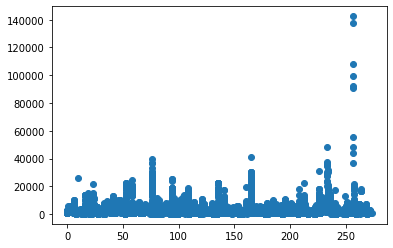

In [202]:
x = data.BrandName
y = data.SellPrice
plt.scatter(x,y)

**Splitting data into train, validation and test sets.**

In [203]:
#loading the data
import pandas as pd
data.describe()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
count,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000
mean,152.153423,11576.188829,877.233208,419.527798,1868.885233,30.752650,3.617075
std,81.748796,6765.449591,263.614851,313.273341,3002.641400,11.794843,2.037621
min,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000
25%,85.000000,5308.250000,957.000000,159.000000,690.000000,25.000000,2.000000
50%,143.000000,11358.500000,960.000000,285.000000,1190.000000,34.000000,4.000000
75%,234.000000,17272.000000,965.000000,659.000000,1999.000000,34.000000,6.000000
max,273.000000,23875.000000,1170.000000,1095.000000,142500.000000,64.000000,6.000000


In [204]:
#providing the input and output data
#importing the numpy library
import numpy as np
#the input data(x,regressor)
x=np.array(data["BrandName"]).reshape(-1,1)
x.shape

(30758, 1)

In [205]:
#the output data(y,predictor)
y=np.array(data["SellPrice"])
y.shape

(30758,)

In [206]:
#Splitting the dataset now
#import the train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.30)
#Exploring the train and test dataset
x_train.shape

(21530, 1)

In [207]:
x_test.shape

(9228, 1)

In [208]:
y_train.shape

(21530,)

In [209]:
y_test.shape

(9228,)

**Illustration of Patterns of Interest**

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

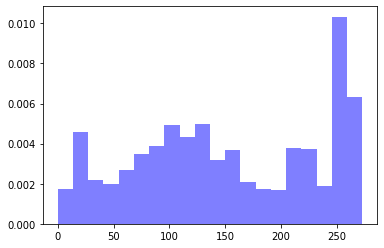

In [210]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline
mu =30
sigma=5
x = data.BrandName
plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel()

plt.show()

In [ ]:
y = data.SellPrice

plt.hist((x,y),
         density=True,
         histtype='bar',
         alpha=0.5)

plt.xlabel('Brand Name')
plt.xticks([0,2,4,6,8,100])
plt.ylabel('Sell Price')
plt.title('Histogram of Sell Price Against Brand Name')

plt.show()

In [ ]:
y=data.BrandName
plt.hist(y, 5)

plt.show()

We can notice that there is a lack of values, and that "Sizes" has its most part in non-existent values
and that it has 1172 different sizes for the products

Another inconsistency 'Size:Error Size' is found

With the size of the dataset and its feature number, there may be duplicate values

Analyzing the 'Deatils' variable, we can see that there are products that are separated only by color, we will not take color into account when recommending a product because if a product has already been purchased, I will consider that there will be no desire to buy another one with just another color

We will make a next loop to properly separate the size of the products, we first remove the colors from the 'Deatils' variable so that in the next loop there is less iteration

data = data[data.columns[1:]]